# Class Capstone 6: Income Classification Model

## Room 4

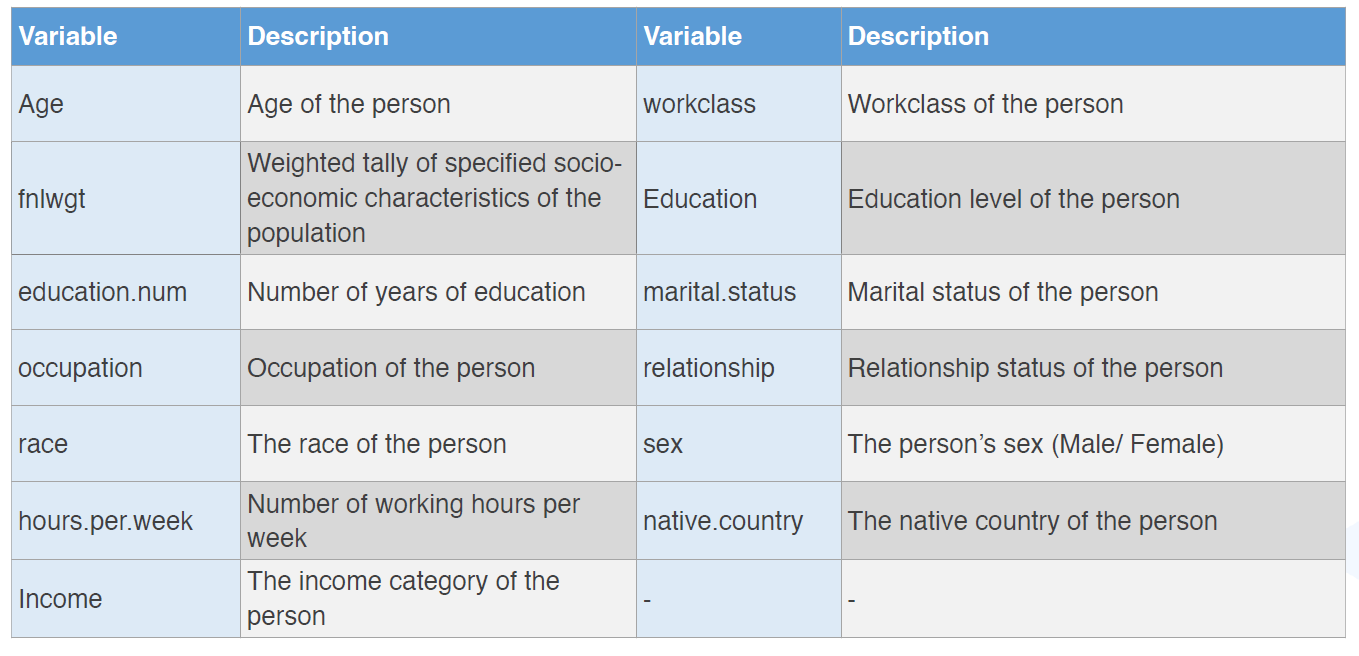

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [3]:
#importing csv
df = pd.read_csv(r'adultcensusincome.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Check for null values and ? in any columns and handle those values. Check the distribution of
target variable income and identify if the dataset is balanced.
• Perform the following Univariate analysis: Create a distribution plot for columns income, age,
education.num, and education
• Create a pie chart for Marital status. Use column marital.status
• Perform the following Bivariate analysis
• Using Plotly, build a scatter plot for age and education.num. Add income and hours per
week for color and size.
• Using Seaborn, build a violin plot of education and age. Add income for hue and use
split=True and inner=‘quart’

In [4]:
# Check for null values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
# check for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# check for ?
print((df == "?").sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [10]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [12]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [15]:
# since it is categorical and not easy to determine the missing values, we will replace these with unknown
col_to_replace = ['workclass','occupation','native.country']
df[col_to_replace] = df[col_to_replace].replace('?','unknown')
df.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unknown,77053,HS-grad,9,Widowed,unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unknown,186061,Some-college,10,Widowed,unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,unknown,>50K


In [ ]:
# check for target distribution and balance
df['income'].value_counts(normalize=True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

<Axes: ylabel='income'>

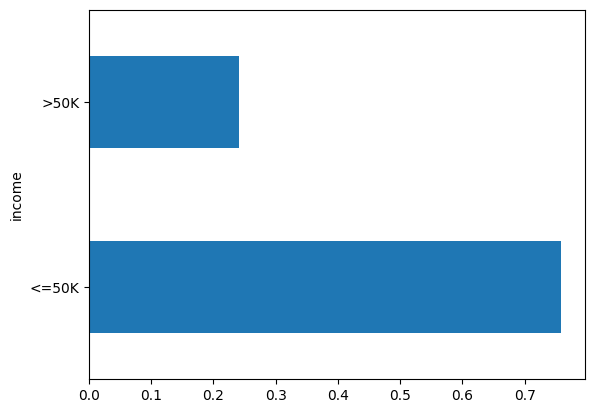

In [18]:
df['income'].value_counts(normalize=True).plot(kind='barh')

>Dataset is imbalanced with ratio of 76:24 between the 2 categories

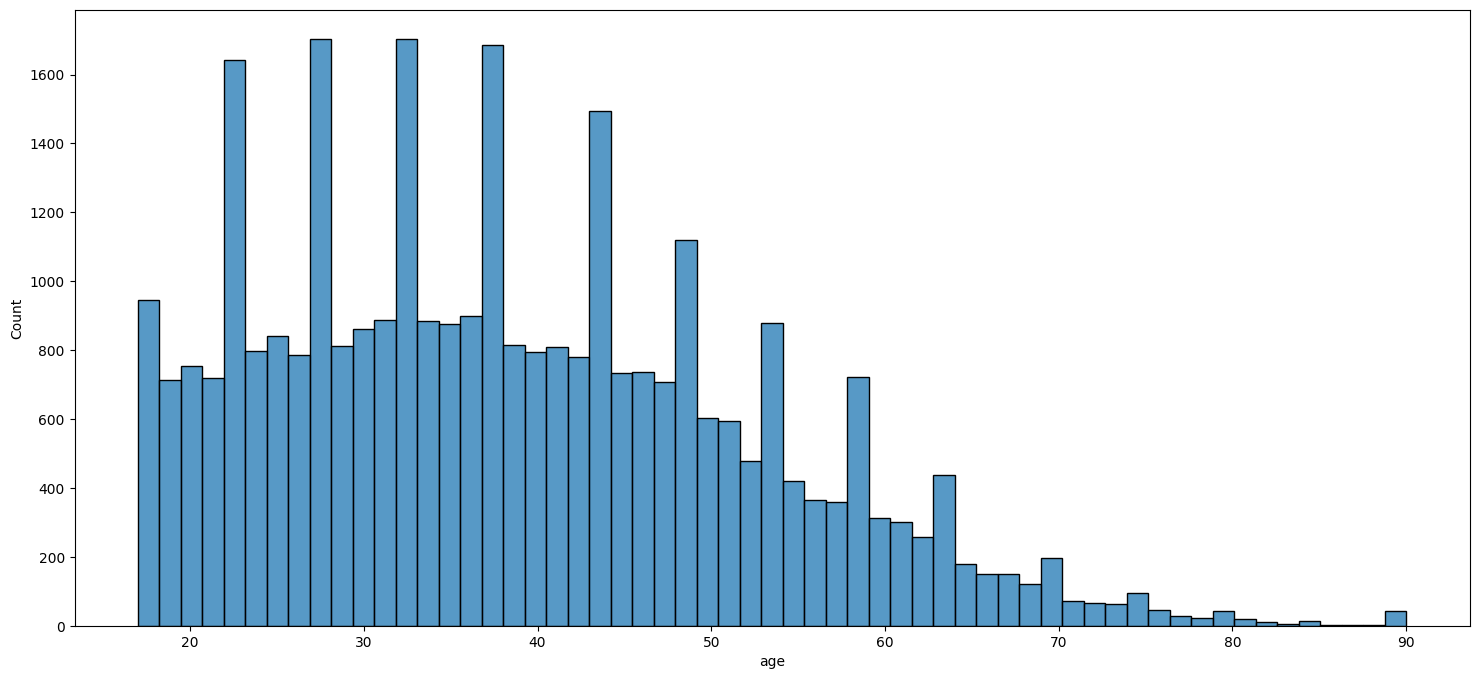

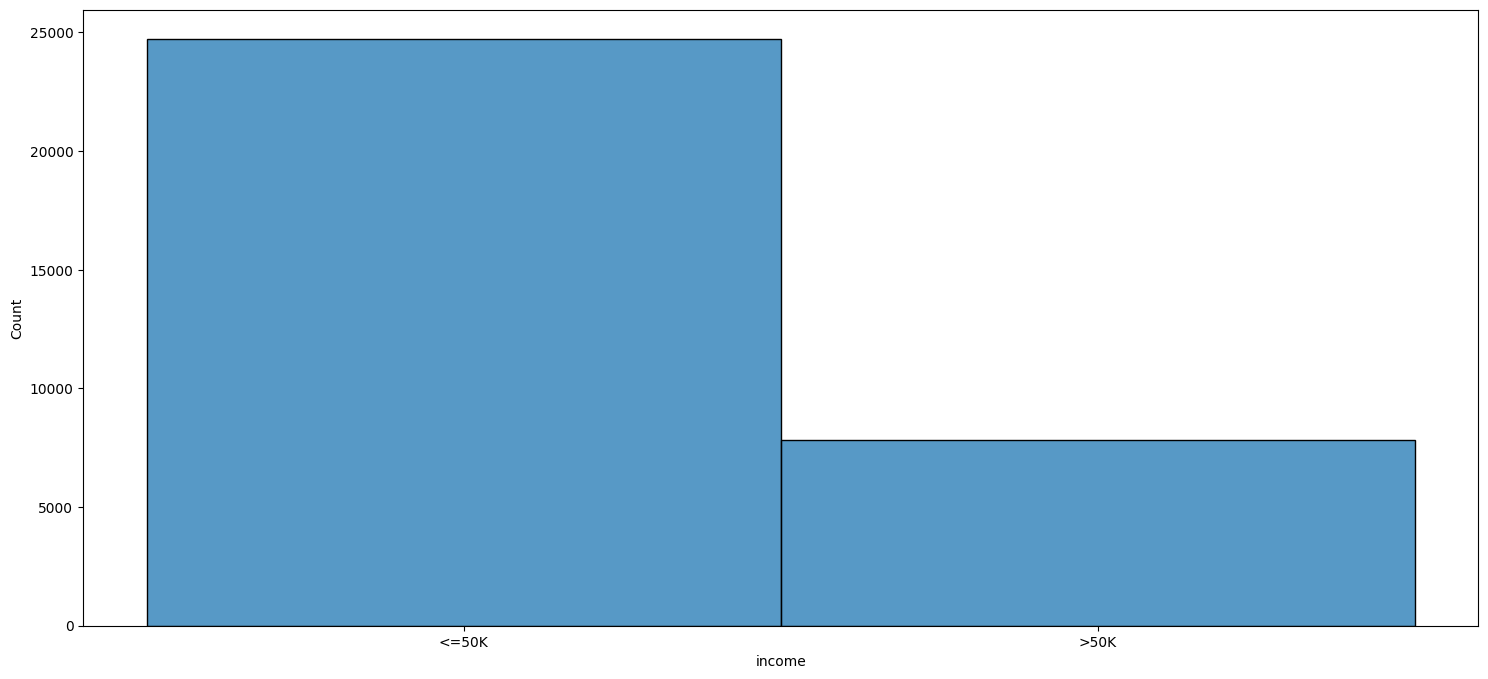

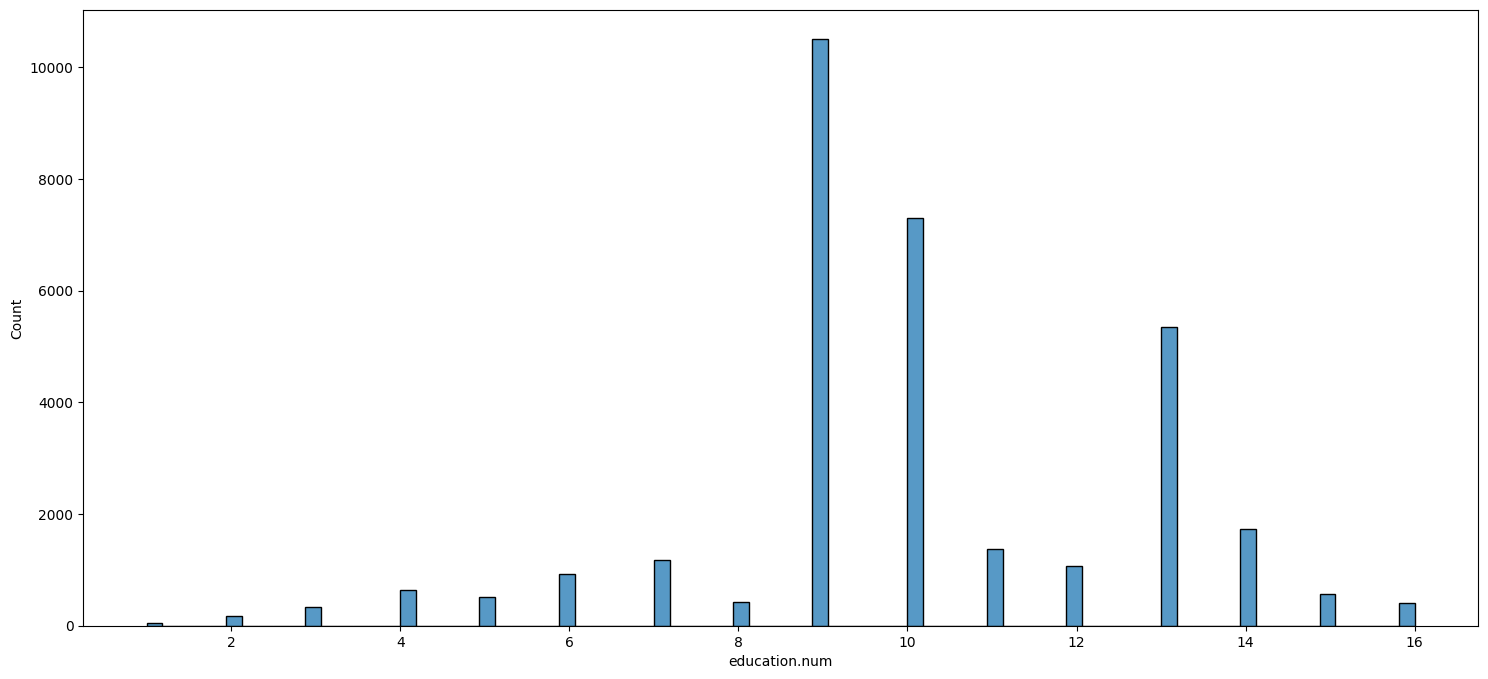

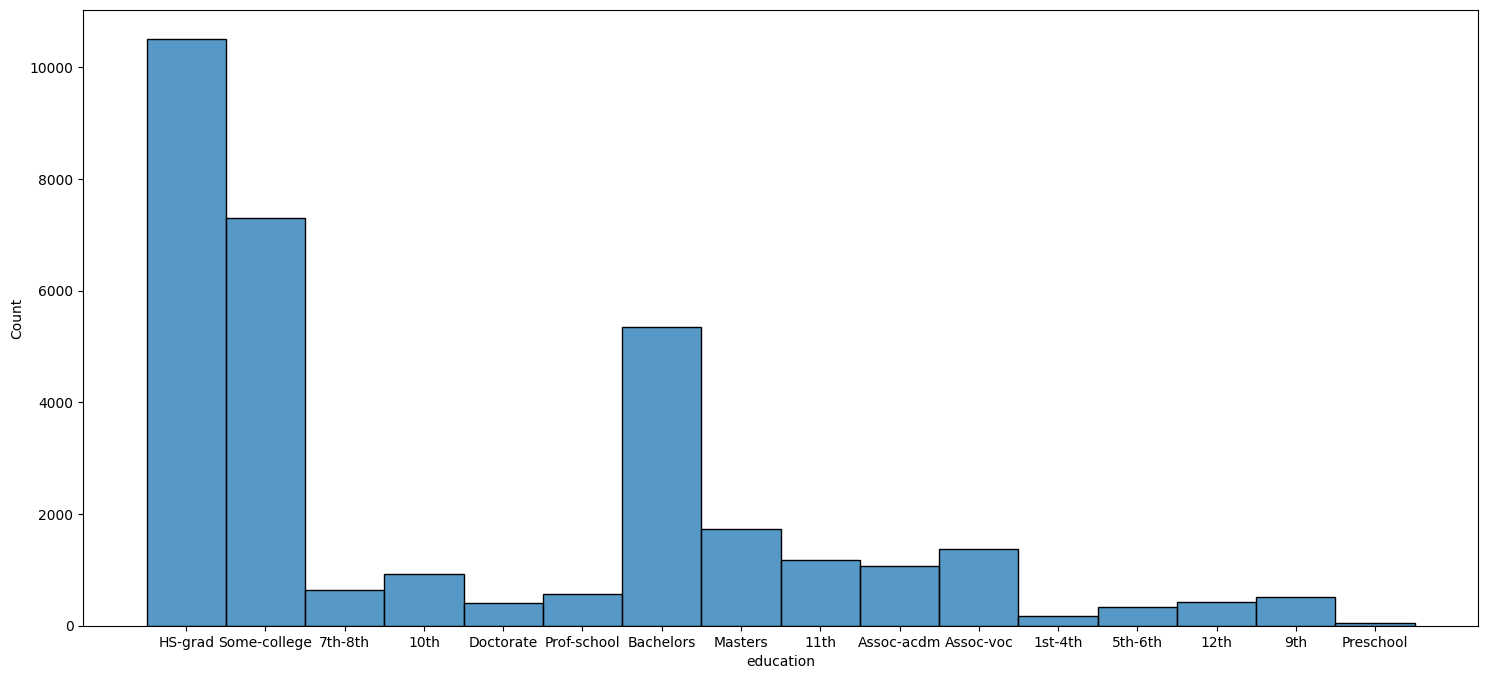

In [ ]:
#distribution plot for age, income, education, education.num
cols_for_dist = ['age','income','education.num','education']
for column in cols_for_dist:
    plt.figure(figsize=(18,8))
    sns.histplot(df[column])

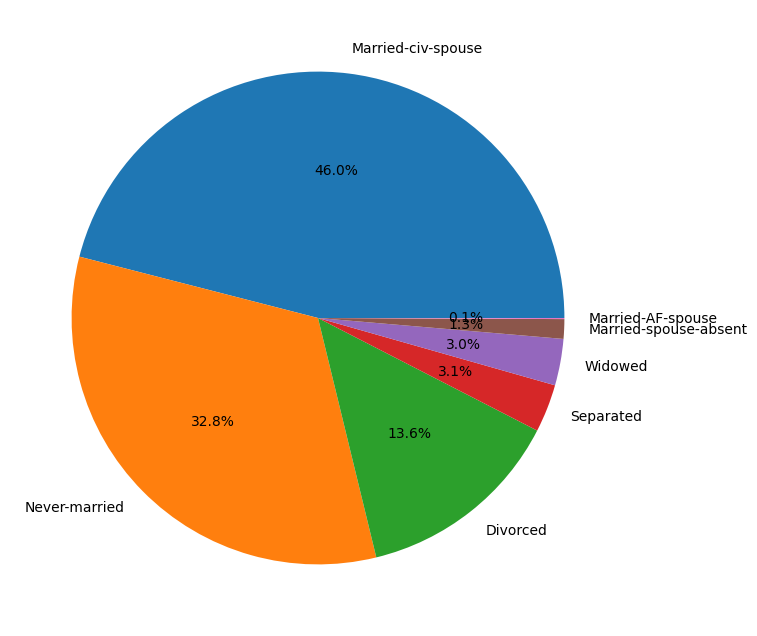

In [37]:
# pie chart for marital status
plt.figure(figsize=(8,8))
plt.pie(df['marital.status'].value_counts(), labels=df['marital.status'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [46]:
# Using Plotly, build a scatter plot for age and education.num. Add income and hours per week for color and size.
# Create the scatter plot
fig = px.scatter(
    df, 
    x='age', 
    y='education.num', 
    color='income', 
    size='hours.per.week', 
    title='Scatter Plot of Age and Education.num with Income and Hours per Week',
    labels={
        'age': 'Age',
        'education.num': 'Number of Years of Education',
        'income': 'Income',
        'hours.per.week': 'Hours per Week'
    },
    color_discrete_map={'<=50K':'blue','>50K':'red'}
)

# Show the plot
fig.show()

**Observation:**
- Higher number of education relates to higher income through most age ranges

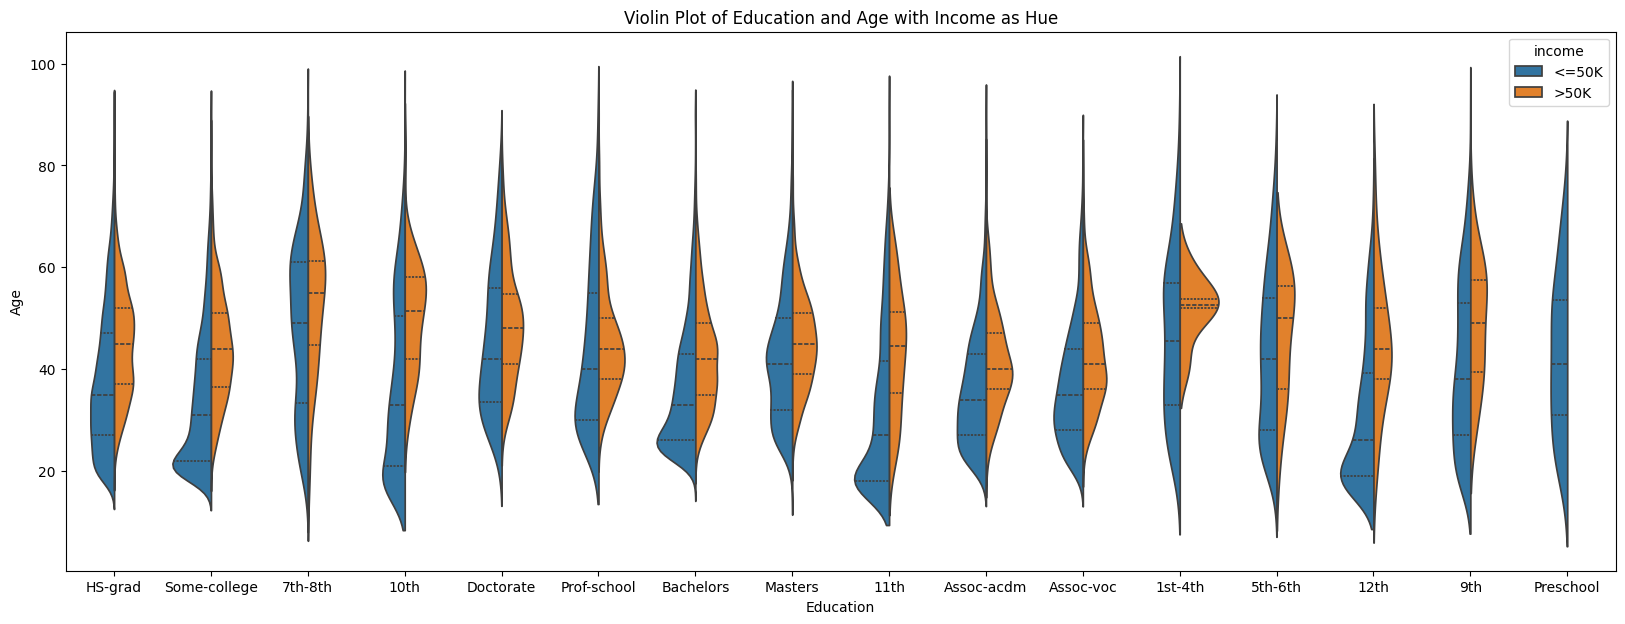

In [49]:
# Using Seaborn, build a violin plot of education and age. Add income for hue and use split=True and inner=‘quart
# Create the violin plot
plt.figure(figsize=(20,7))
sns.violinplot(x='education', y='age', hue='income', data=df, split=True, inner='quart')

# Add title and labels
plt.title('Violin Plot of Education and Age with Income as Hue')
plt.xlabel('Education')
plt.ylabel('Age')

# Display the plot
plt.show()

**Observations:**
- Those with preschool education level all have incomes <=50K
- In educatin level of 1st-4th tend to have a higher median of income for age group 50-60 relative to their group -- this may be due to experience
- Lower age group of 20s tend to have larger median towards <=50K income

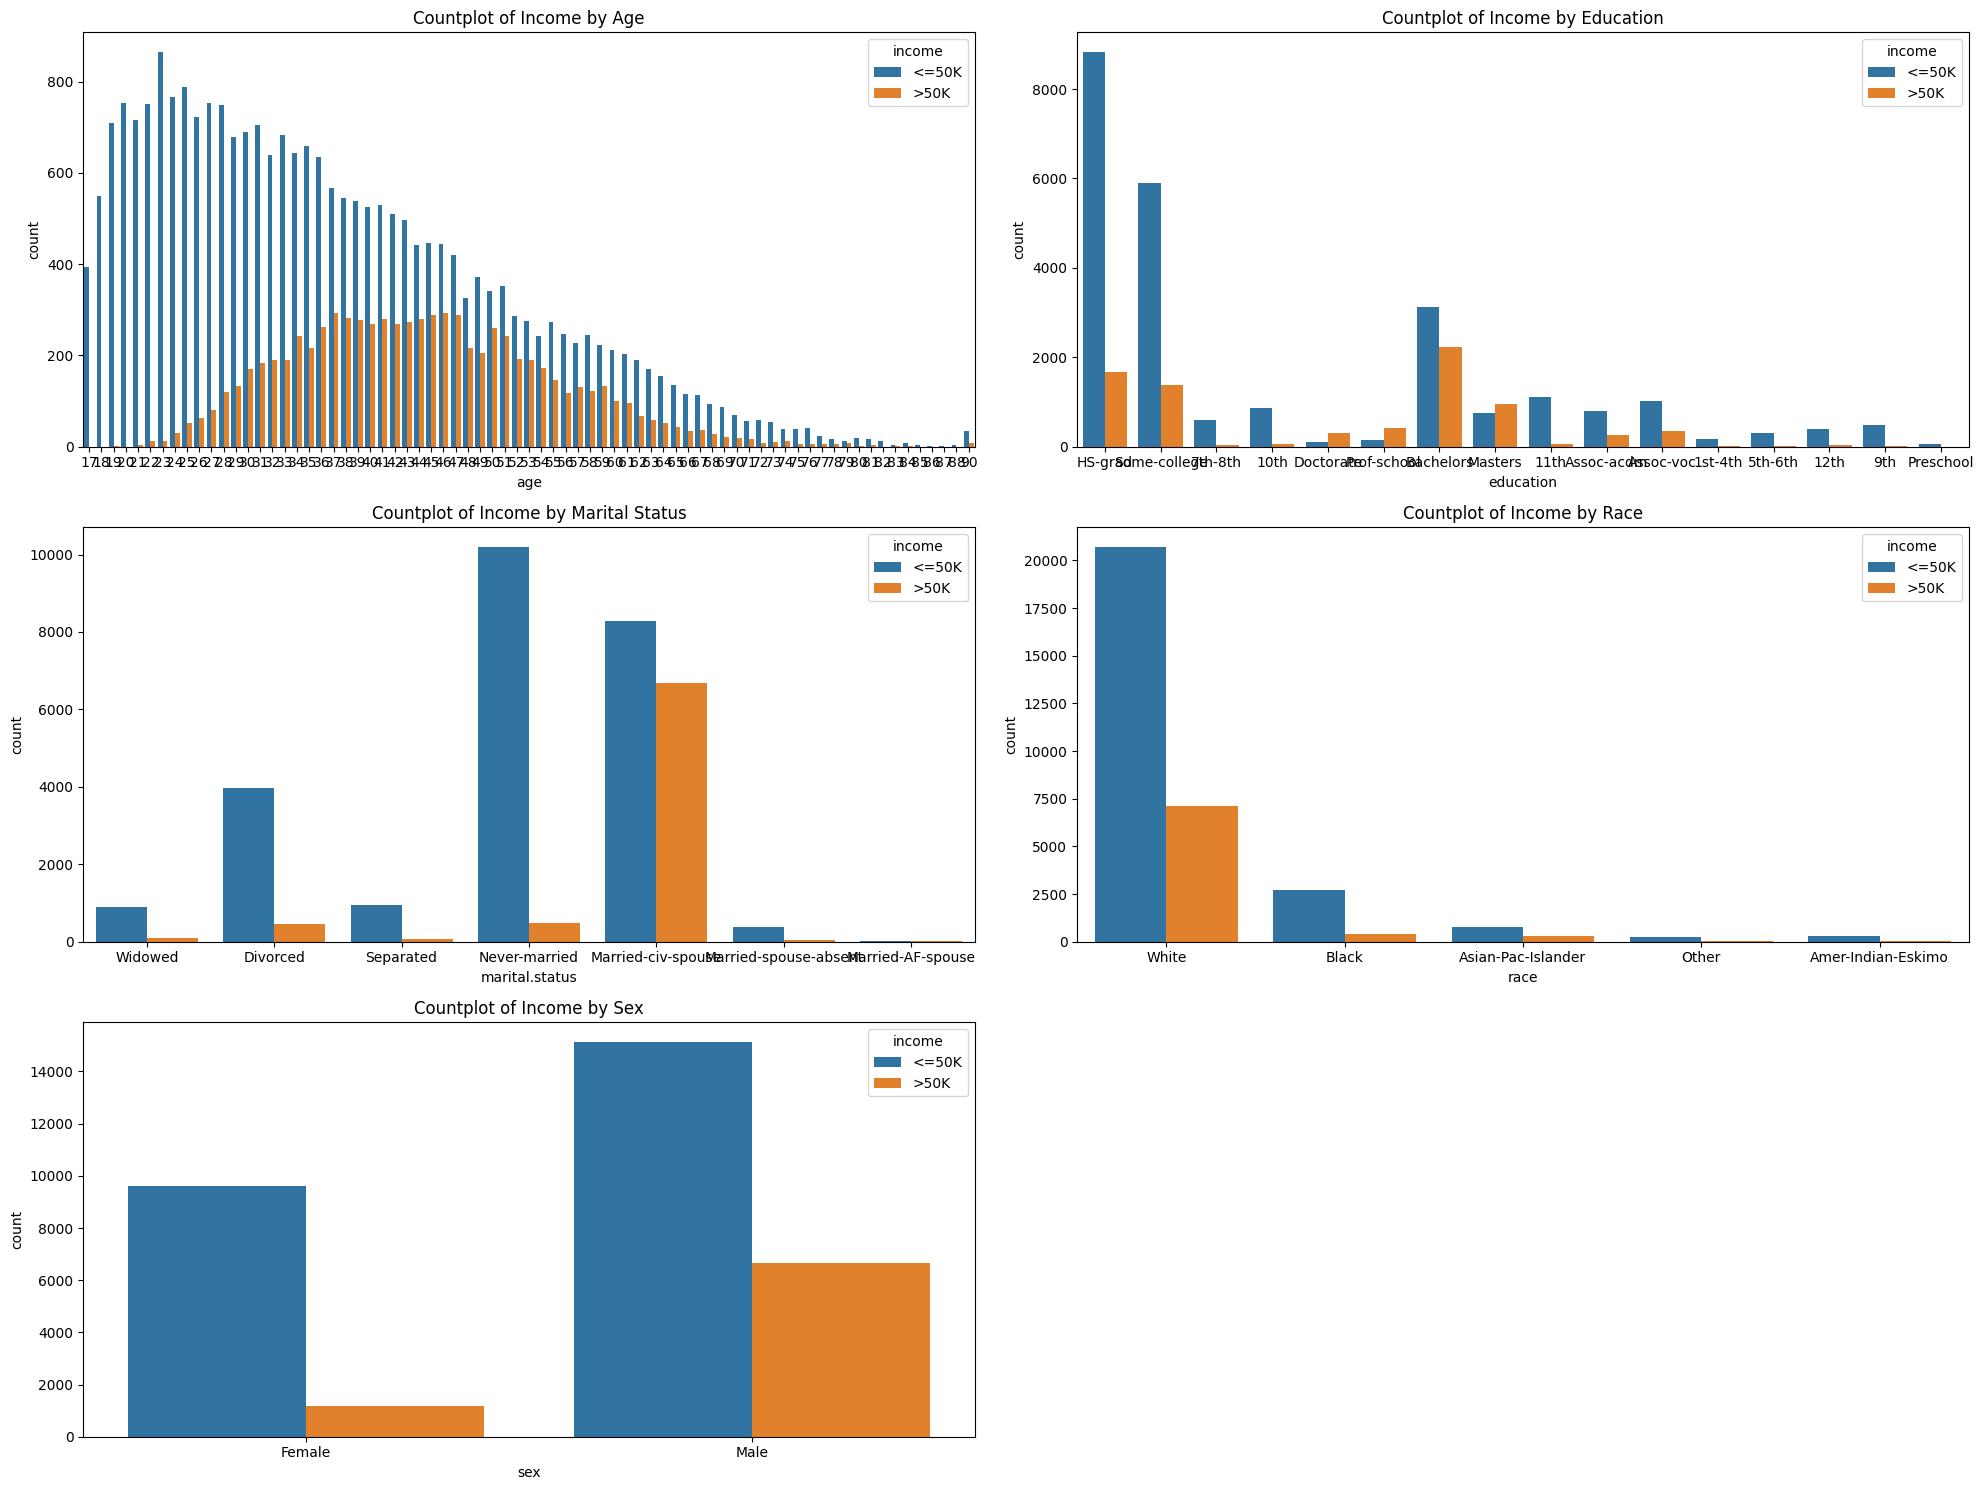

In [ ]:
#Perform the following Bivariate analysis
#• Create a countplot of income across columns age, education, marital status, race, sex

# Create a figure with multiple countplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# Create a countplot for each column
sns.countplot(ax=axes[0, 0], data=df, x='age', hue='income')
axes[0, 0].set_title('Countplot of Income by Age')

sns.countplot(ax=axes[0, 1], data=df, x='education', hue='income')
axes[0, 1].set_title('Countplot of Income by Education')

sns.countplot(ax=axes[1, 0], data=df, x='marital.status', hue='income')
axes[1, 0].set_title('Countplot of Income by Marital Status')

sns.countplot(ax=axes[1, 1], data=df, x='race', hue='income')
axes[1, 1].set_title('Countplot of Income by Race')

sns.countplot(ax=axes[2, 0], data=df, x='sex', hue='income')
axes[2, 0].set_title('Countplot of Income by Sex')

# Hide the unused subplot (if necessary)
fig.delaxes(axes[2, 1])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [52]:
df['sex'].value_counts(normalize=True)

sex
Male      0.669205
Female    0.330795
Name: proportion, dtype: float64

**Observations:**
- Ages 70+ tend to have lower income
- Race shows whites having higher income than the other groups (could be data skewness of the sample as well)
- Data samples seem skewed towards certain segments of the population -- in categories like race, sex, etc
- Marital status of Married is likely to make more than 50K in income and vice versa
- In education category, those with Masters and above have higher than 50K income 

In [ ]:
#• Draw a heatmap of data correlation and find out the columns to which income is highly correlated
